<a href="https://colab.research.google.com/github/Endework/Zindi_projects/blob/main/Insurance_Prediction__Challange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Prediction
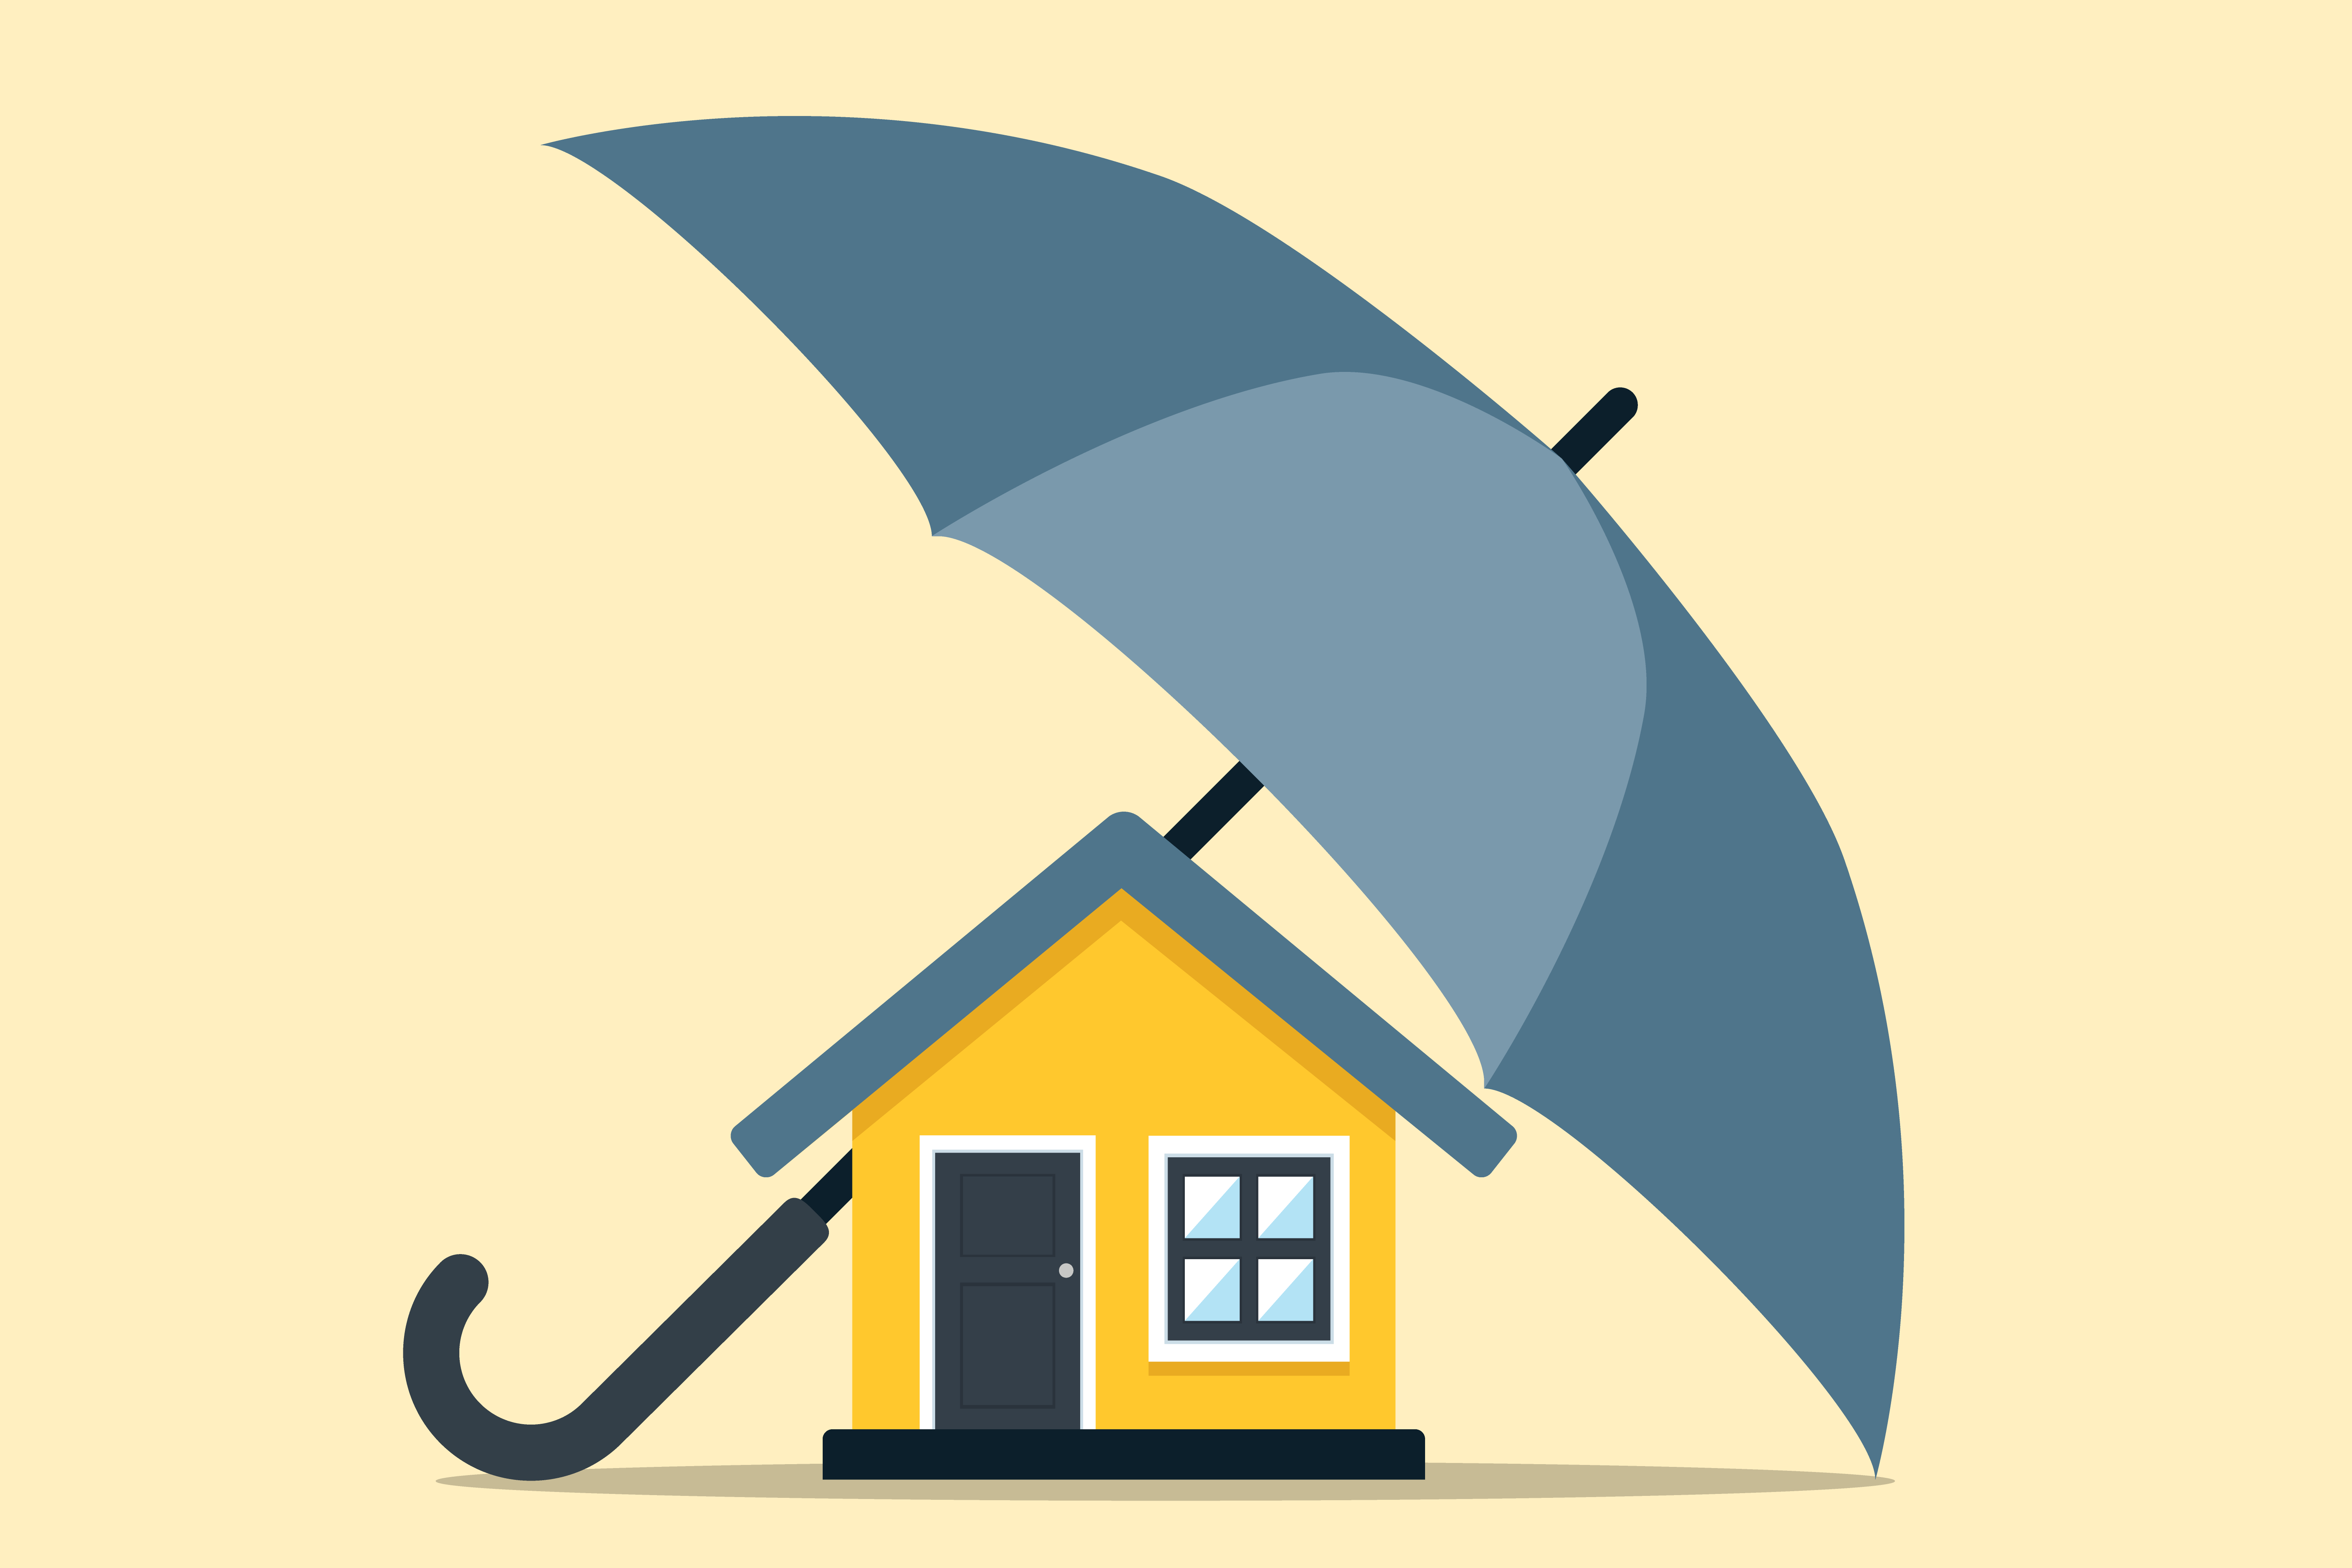

# Description
Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

The aim of the project is  to build a predictive model to determine if a building will have an insurance claim during a certain period or not.

The model will be based on the building characteristics. The target variable, Claim, is a:

1 if the building has at least a claim over the insured period.
0 if the building doesn’t have a claim over the insured period.

In [35]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [36]:
# Load  data
TestData = pd.read_csv("test_data.csv")
TrainData = pd.read_csv("train_data.csv")




In [37]:

#Now, let's see if we have missing values in the TestData
TestData.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

# Cleaning Test data and Train data

In [38]:
#cleaning the Building Dimension column of the test data by filling the missing values with the mean
TestData['Building Dimension'] = TestData['Building Dimension'].fillna(TestData['Building Dimension'].mean())
#cleaning the Garden column of the test data by filling the missing values with the most common category (the mode). This is a reasonable approach for catagorical data
TestData['Garden'] = TestData['Garden'].fillna(TestData['Garden'].mode()[0])
#cleaning the Date_of_Occupancy column of the test data by filling the missing values with the median.
TestData['Date_of_Occupancy'] = TestData['Date_of_Occupancy'].fillna(TestData['Date_of_Occupancy'].median())
#Pandas dataframe.ffill() function is used to fill the missing value in the dataframe. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.
TestData['Geo_Code'].ffill(inplace=True)


In [39]:
#Now, let's see if we have missing values in the TestData
TestData.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [40]:

TrainData.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [41]:
#cleaning the Building Dimension column of the train data by filling the missing values with the mean
TrainData['Building Dimension'] = TrainData['Building Dimension'].fillna(TrainData['Building Dimension'].mean())
#cleaning the Garden column of the train data by filling the missing values with the most common category (the mode). This is a reasonable approach for catagorical data
TrainData['Garden'] = TrainData['Garden'].fillna(TrainData['Garden'].mode()[0])
#cleaning the Date_of_Occupancy column of the train data by filling the missing values with the median.
TrainData['Date_of_Occupancy'] = TrainData['Date_of_Occupancy'].fillna(TrainData['Date_of_Occupancy'].median())
#Pandas dataframe.ffill() function is used to fill the missing value in the dataframe. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.
TrainData['Geo_Code'].ffill(inplace=True)


In [23]:
#Now, let's see if we have missing values in the TrainData
TrainData.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

# Visualization

<ipython-input-48-eb1f885ff920>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=TrainData, x=column, palette=palettes[i])


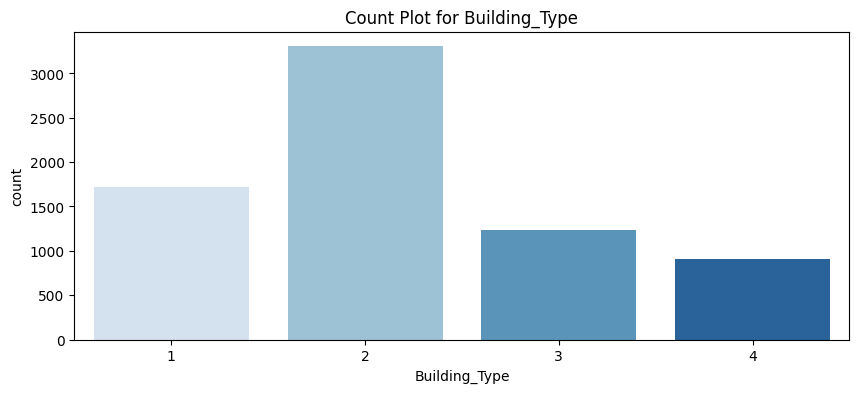

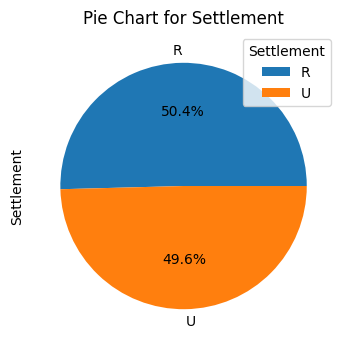

<ipython-input-48-eb1f885ff920>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=TrainData, x=column, palette=palettes[i])


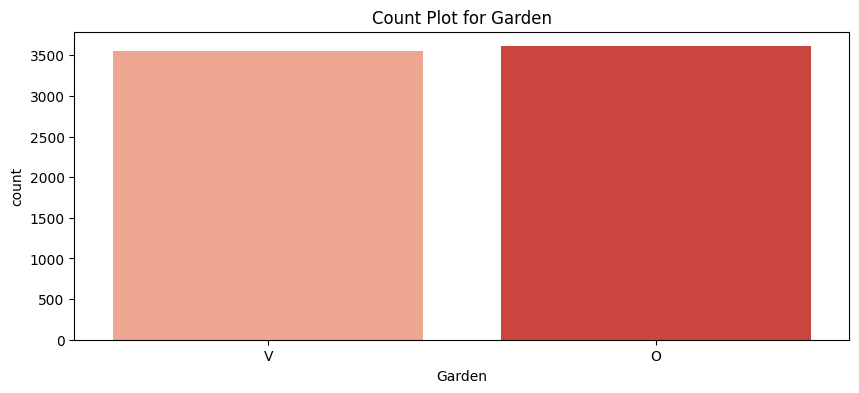

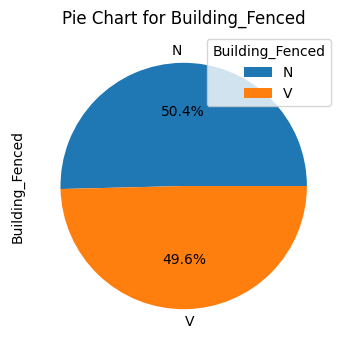

<ipython-input-48-eb1f885ff920>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=TrainData, x=column, palette=palettes[i])


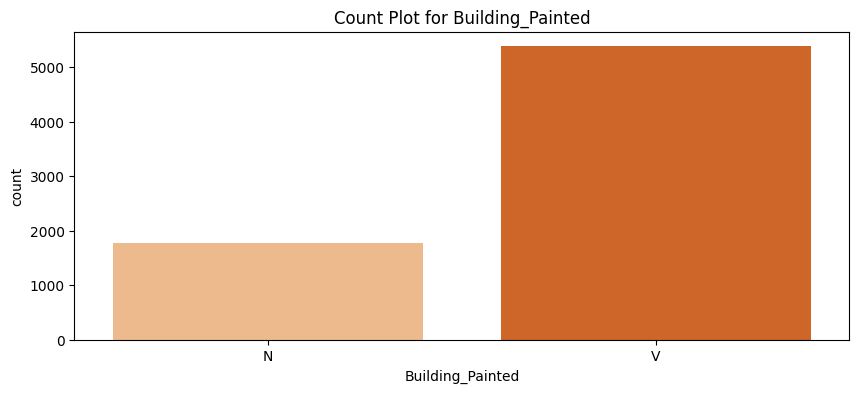

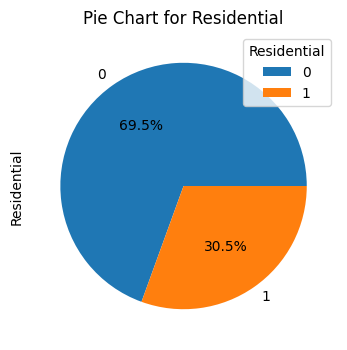

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Building_Type', 'Settlement', 'Garden', 'Building_Fenced', 'Building_Painted', 'Residential']
palettes = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges', 'Greys']

for i, column in enumerate(categorical_columns):
    plt.figure(figsize=(10, 4))

    # Use countplot for even index and pie chart for odd index
    if i % 2 == 0:
        sns.countplot(data=TrainData, x=column, palette=palettes[i])
        plt.title(f'Count Plot for {column}')
    else:
        TrainData[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Pie Chart for {column}')
        plt.legend(title=column, loc='upper right')

    plt.show()


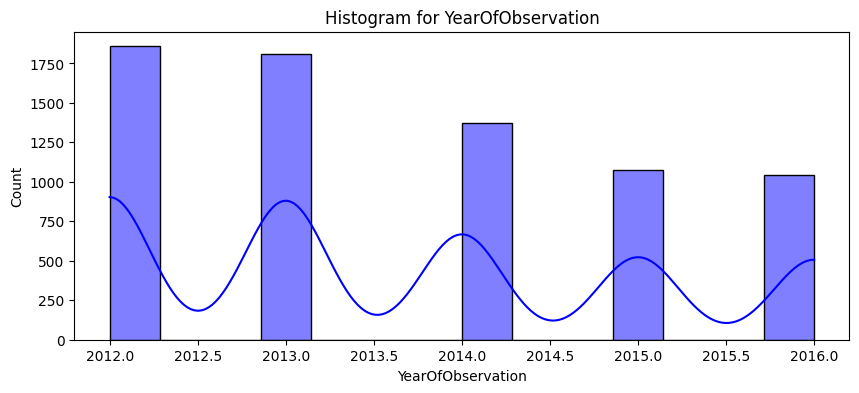

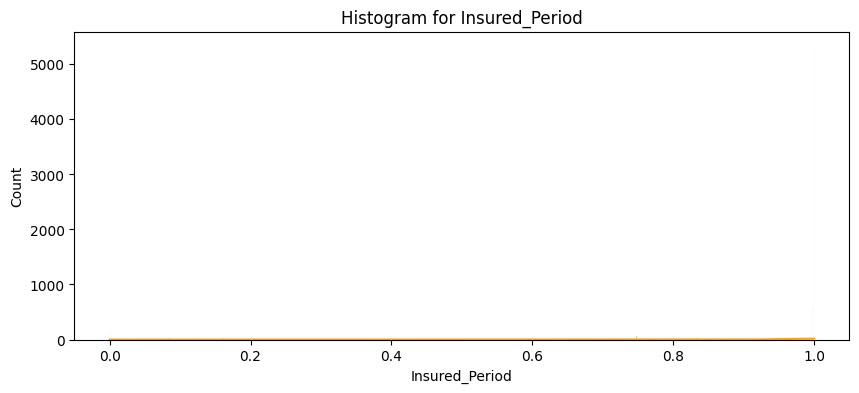

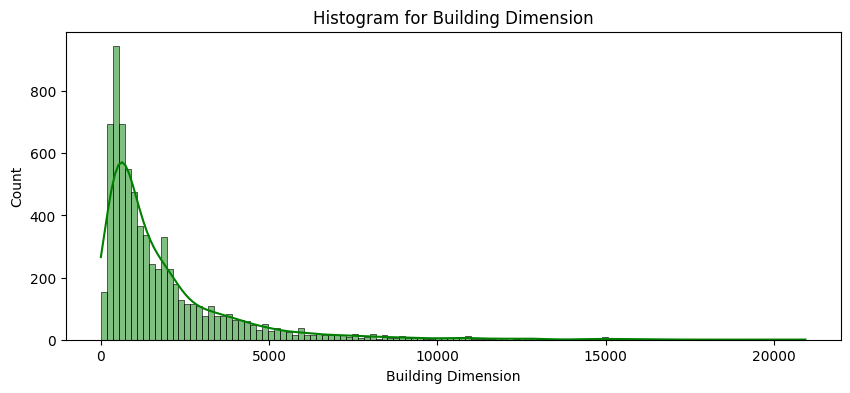

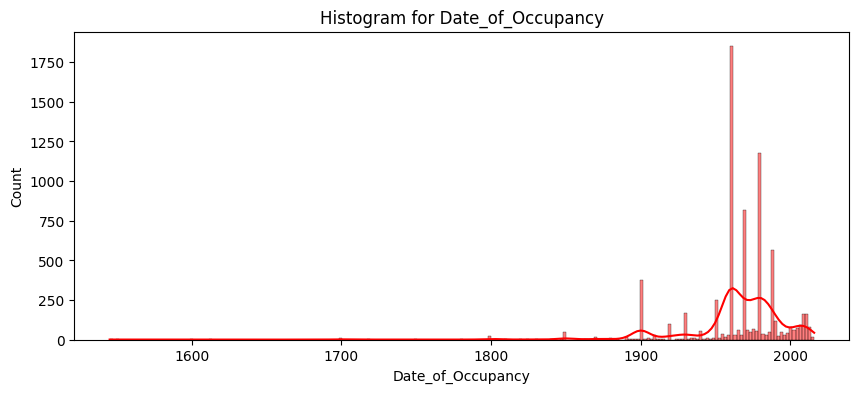

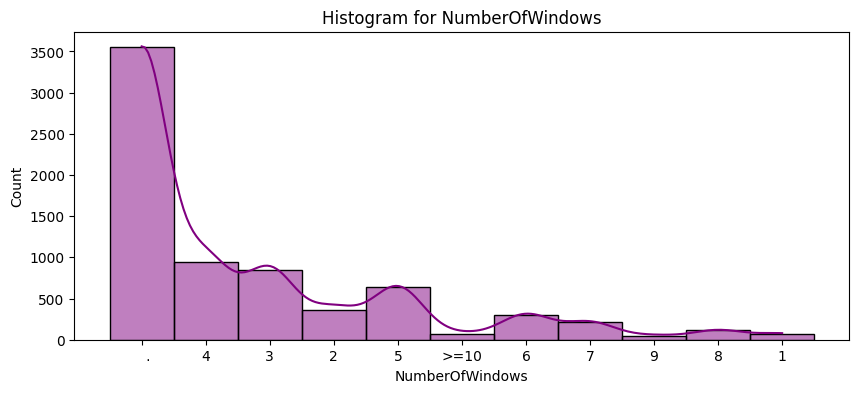

In [46]:
numerical_columns = ['YearOfObservation', 'Insured_Period', 'Building Dimension', 'Date_of_Occupancy', 'NumberOfWindows']
colors = ['blue', 'orange', 'green', 'red', 'purple']

for column, color in zip(numerical_columns, colors):
    plt.figure(figsize=(10, 4))
    sns.histplot(data=TrainData, x=column, kde=True, color=color)
    plt.title(f'Histogram for {column}')
    plt.show()


# Preprocess and Feature selection

In [26]:
X_train = TrainData.drop('Claim', axis=1)
y_train = TrainData['Claim']

# our test data is unlabeled, so it's all features
X_test = TestData

# Specifing our selected numerical and categorical features the number of windows has been removes as it has so many biasing data
numerical_features = ['YearOfObservation', 'Insured_Period', 'Building Dimension', 'Date_of_Occupancy']
categorical_features = ['Building_Type', 'Settlement', 'Garden', 'Building_Fenced', 'Building_Painted', 'Residential']

# Creating transformers for the selected numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combining transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fittting and transforming the training data
X_train = preprocessor.fit_transform(X_train)

# Transforming the testing data
X_test = preprocessor.transform(X_test)

# Model training

In [27]:
# Importing the necessary library
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)




LogisticRegression()

In [28]:
# let's use  the model to make predictions on the test data
y_pred = model.predict(X_test)


In [29]:

customer_ids = TestData['Customer Id']

# Creating a DataFrame with customer IDs and predicted claims
results = pd.DataFrame({
    'Customer Id': customer_ids,
    'Claim': y_pred
})

# Display the results
print(results)


     Customer Id  Claim
0         H11920      0
1         H11921      0
2          H9805      0
3          H7493      0
4          H7494      0
...          ...    ...
3064      H11583      0
3065      H11720      0
3066      H11721      0
3067      H12408      0
3068       H9021      0

[3069 rows x 2 columns]


In [30]:
# Saving the DataFrame to a CSV file
results.to_csv('predictions.csv', index=False)


# Model Evaluation

lets evaluate the model by using cross validation (am using this method because the test data set wasn't labled)

In [31]:
# Importing necessary libraries
from sklearn.model_selection import cross_val_score

# Initializing the model
model = LogisticRegression()

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

# Print the AUC scores
print(f'AUC scores: {scores}')

# Print the average AUC score
print(f'Average AUC score: {scores.mean()}')


AUC scores: [0.71624241 0.7215285  0.72157278 0.7001024  0.68098994]
Average AUC score: 0.7080872059672549


*Our  model’s average AUC score across the 5 folds of cross-validation is approximately 0.708. This suggests that the model has a good measure of separability and is able to distinguish between positive and negative classes fairly well.*

